In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('analysis_results.csv')
metric = 'r2'

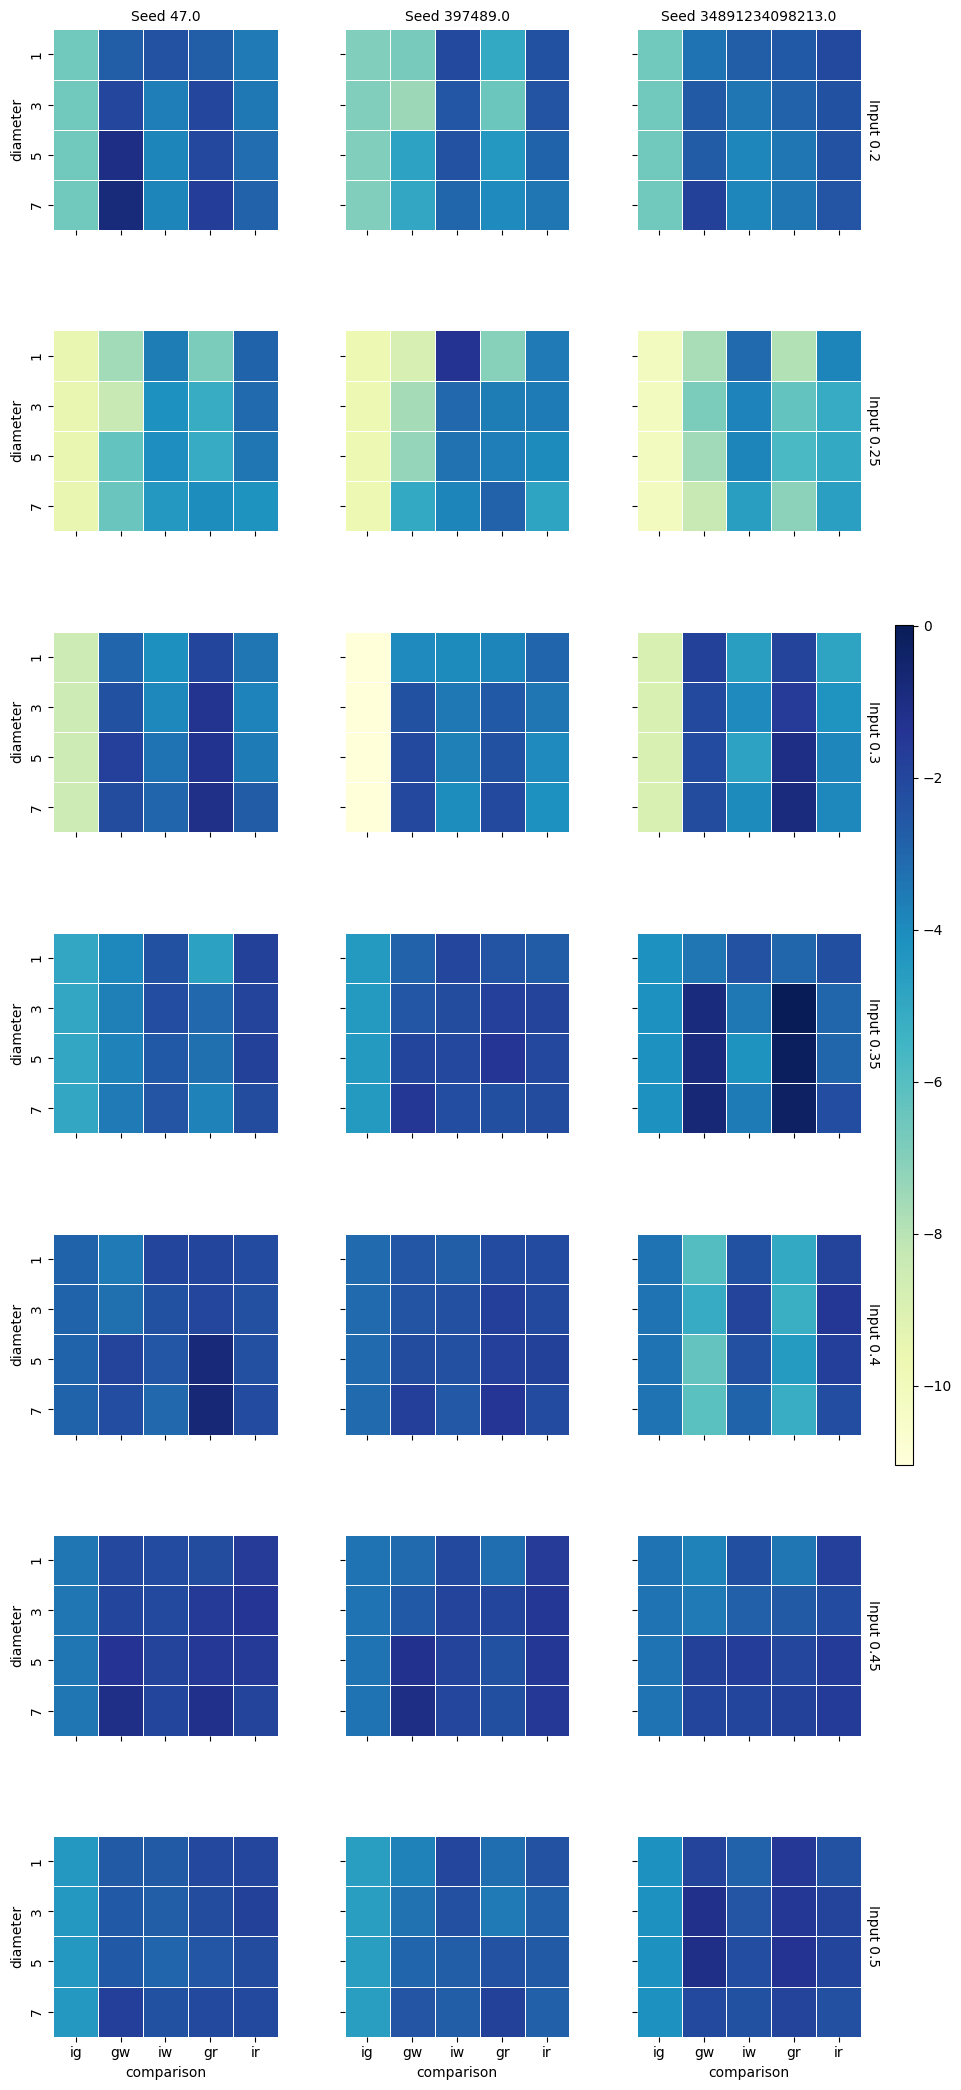

In [37]:
# Convert 'comparison' to a categorical type
df['comparison'] = pd.Categorical(df['comparison'], categories=['ig', 'gw', 'iw', 'gr', 'ir'])

# Calculate global min and max for the mae values
vmin = df[metric].min()
vmax = df[metric].max()

# Plot heatmap with FacetGrid
g = sns.FacetGrid(df, col="seed", row="co_occ", margin_titles=True, height=3)

# Define a function to map heatmap without individual colorbars
def heatmap_no_colorbar(data, **kws):
    sns.heatmap(data.pivot_table(values=metric, index='diameter', columns='comparison', observed=False), 
                **kws, cbar=False, cmap="YlGnBu", linewidths=.5, vmin=vmin, vmax=vmax)

g.map_dataframe(heatmap_no_colorbar)
g.set_titles(row_template='Input {row_name}', col_template='Seed {col_name}')

# Add a single colorbar for the entire grid
cbar_ax = g.fig.add_axes([1, 0.3, 0.02, 0.4])  # [left, bottom, width, height]
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap="YlGnBu", norm=norm)
sm.set_array([])  # Only needed for matplotlib < 3.1
g.fig.colorbar(sm, cax=cbar_ax)

# Adjust spacing to prevent overlap
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.savefig("./analysis_results/hm_analysis_viz_" + metric + ".pdf", format="pdf", bbox_inches="tight")
plt.show()

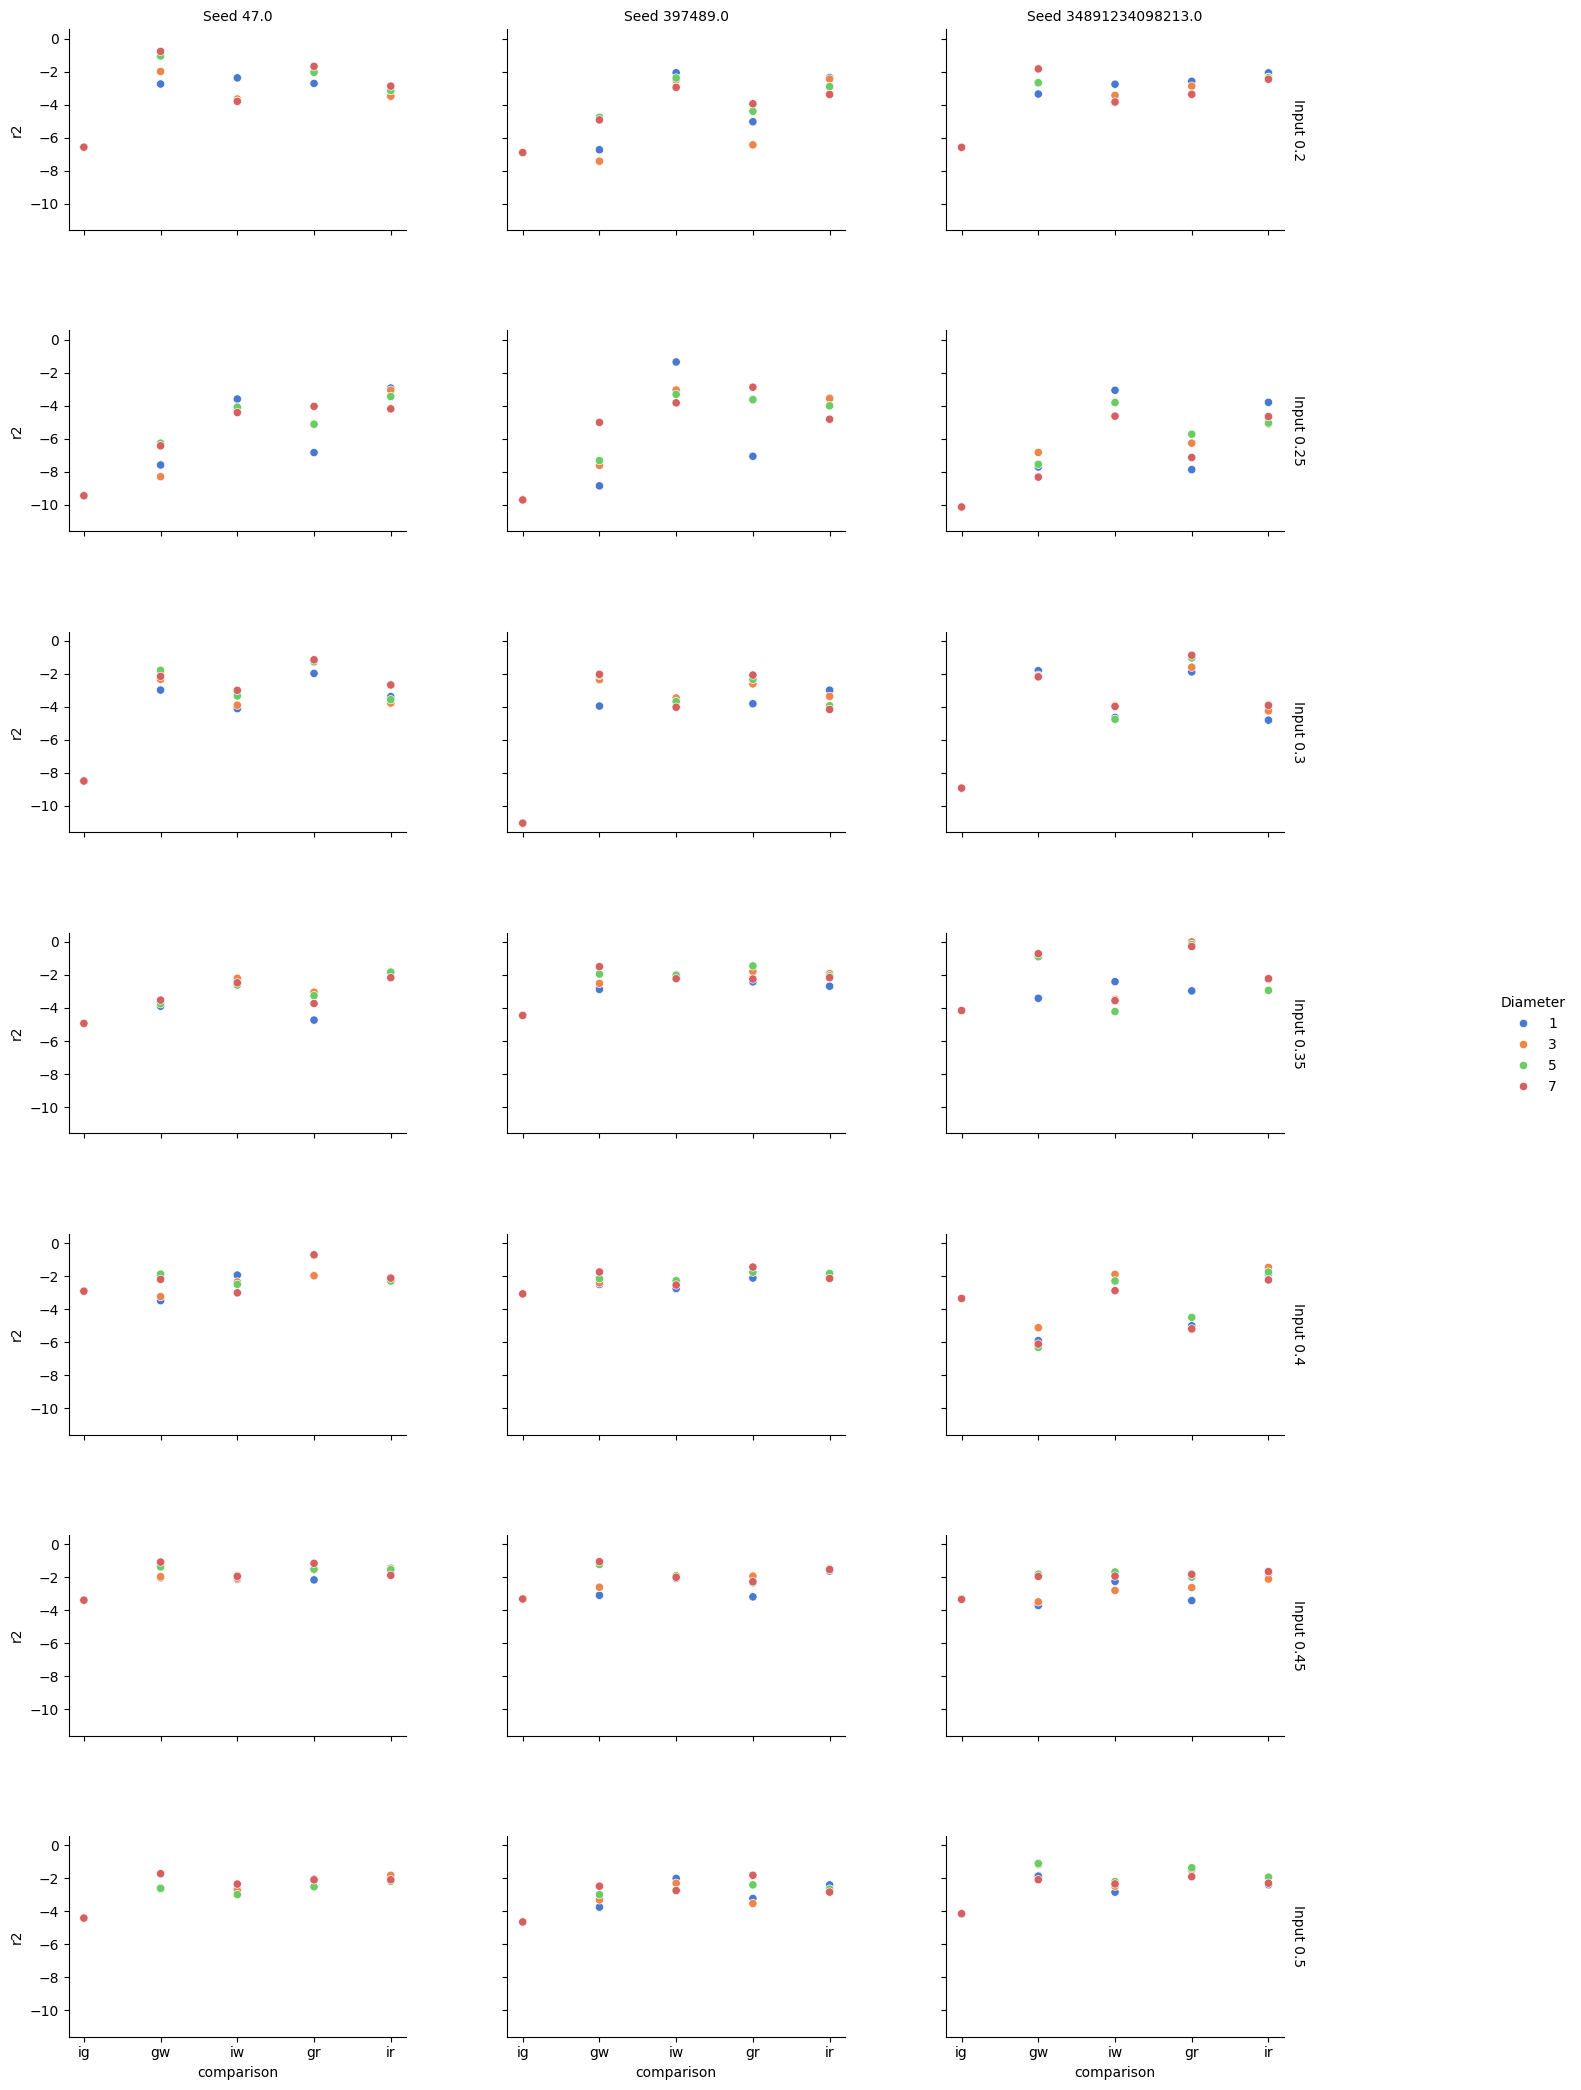

In [38]:
# Convert 'comparison' to a categorical type
df['comparison'] = pd.Categorical(df['comparison'], categories=['ig', 'gw', 'iw', 'gr', 'ir'])

# Plot scatterplots with FacetGrid
g = sns.FacetGrid(df, col="seed", row="co_occ", margin_titles=True, height=3, aspect=1.5)
g.map_dataframe(sns.scatterplot, x="comparison", y=metric, hue="diameter", palette="muted")

# Adjust titles and legends
g.set_titles(row_template='Input {row_name}', col_template='Seed {col_name}')
g.add_legend(title='Diameter', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Adjust spacing to prevent overlap
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.savefig("./analysis_results/sc_analysis_viz_" + metric + ".pdf", format="pdf", bbox_inches="tight")
plt.show()